In [1]:
# importing libraries
import pandas as pd
import numpy as np
# visualiation 
import seaborn as sns
import matplotlib.pyplot as plt
# To creat a model for  training AND testing the model by import the sklearn library.
from sklearn.model_selection import train_test_split
# importing the libraries to set uo the model
from sklearn.linear_model import LinearRegression
# lets import some stastitical parameters from sklearn to have some conclusion of the model 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\MediMonster\OneDrive\Desktop\Bootcamp Liege\Week 5\immo-eliza-data-exploration-jakarta\datasets\cleaned_dataset.csv')
df

,Unnamed: 0,id,type,subtype,bedroomCount,bathroomCount,province,locality,habitableSurface,roomCount,...,hasLift,heatingType,kitchenSurface,kitchenType,landSurface,parkingCountOutdoor,hasTerrace,terraceSurface,epcScore,price
0,0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels 1040,Etterbeek,100.0,6.0,...,True,GAS,12.0,SEMI_EQUIPPED,461.0,2.0,True,7.0,C,399000.0
1,1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels 1040,Etterbeek,270.0,12.0,...,True,FUELOIL,6.0,INSTALLED,209.0,2.0,True,1.0,E,895000.0
2,2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels 1040,Etterbeek,87.0,6.0,...,True,FUELOIL,12.0,HYPER_EQUIPPED,461.0,2.0,True,2.0,F,465000.0
3,3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels 1040,Bruxelles,104.0,6.0,...,True,GAS,12.0,HYPER_EQUIPPED,461.0,2.0,True,3.0,B,590000.0
4,4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels 1040,Etterbeek,71.0,6.0,...,True,GAS,12.0,INSTALLED,461.0,2.0,True,15.0,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80363,440319,20663057.0,HOUSE,VILLA,3.0,1.0,Antwerp 2830,Willebroek,252.0,1.0,...,True,GAS,15.0,INSTALLED,723.0,3.0,True,15.0,B,849000.0
80364,440364,20664347.0,APARTMENT,APARTMENT,3.0,1.0,Brussels 1090,Jette,94.0,6.0,...,True,GAS,8.0,SEMI_EQUIPPED,461.0,2.0,True,10.0,D,279000.0
80365,440966,20664354.0,APARTMENT,APARTMENT,3.0,1.0,Flemish Brabant 1853,Grimbergen Strombeek-Bever,113.0,6.0,...,True,GAS,10.0,HYPER_EQUIPPED,461.0,2.0,True,9.0,B,299000.0
80366,442237,20664377.0,APARTMENT,APARTMENT,3.0,2.0,West Flanders 8434,Westende,111.0,4.0,...,True,GAS,12.0,INSTALLED,461.0,2.0,True,15.0,A,325000.0


In [18]:
# dropping th columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df

,type,subtype,bedroomCount,bathroomCount,province,locality,habitableSurface,roomCount,hasBasement,buildingCondition,...,hasLift,heatingType,kitchenSurface,kitchenType,landSurface,parkingCountOutdoor,hasTerrace,terraceSurface,epcScore,price
0,APARTMENT,APARTMENT,2.0,1.0,Brussels 1040,Etterbeek,100.0,6.0,True,GOOD,...,True,GAS,12.0,SEMI_EQUIPPED,461.0,2.0,True,7.0,C,399000.0
1,HOUSE,HOUSE,4.0,2.0,Brussels 1040,Etterbeek,270.0,12.0,True,TO_BE_DONE_UP,...,True,FUELOIL,6.0,INSTALLED,209.0,2.0,True,1.0,E,895000.0
2,APARTMENT,APARTMENT,2.0,1.0,Brussels 1040,Etterbeek,87.0,6.0,True,AS_NEW,...,True,FUELOIL,12.0,HYPER_EQUIPPED,461.0,2.0,True,2.0,F,465000.0
3,APARTMENT,APARTMENT,2.0,2.0,Brussels 1040,Bruxelles,104.0,6.0,True,AS_NEW,...,True,GAS,12.0,HYPER_EQUIPPED,461.0,2.0,True,3.0,B,590000.0
4,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels 1040,Etterbeek,71.0,6.0,True,AS_NEW,...,True,GAS,12.0,INSTALLED,461.0,2.0,True,15.0,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80363,HOUSE,VILLA,3.0,1.0,Antwerp 2830,Willebroek,252.0,1.0,True,AS_NEW,...,True,GAS,15.0,INSTALLED,723.0,3.0,True,15.0,B,849000.0
80364,APARTMENT,APARTMENT,3.0,1.0,Brussels 1090,Jette,94.0,6.0,True,GOOD,...,True,GAS,8.0,SEMI_EQUIPPED,461.0,2.0,True,10.0,D,279000.0
80365,APARTMENT,APARTMENT,3.0,1.0,Flemish Brabant 1853,Grimbergen Strombeek-Bever,113.0,6.0,True,GOOD,...,True,GAS,10.0,HYPER_EQUIPPED,461.0,2.0,True,9.0,B,299000.0
80366,APARTMENT,APARTMENT,3.0,2.0,West Flanders 8434,Westende,111.0,4.0,True,JUST_RENOVATED,...,True,GAS,12.0,INSTALLED,461.0,2.0,True,15.0,A,325000.0


In [19]:
# sanity check of data
df.shape
# info of dataset
df.info()
# finding the missing values
df.isnull().sum()
# finding the missing values in percentage
# df.isnull().sum()/df.shape[0]*100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80368 entries, 0 to 80367
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      80368 non-null  object 
 1   subtype                   80368 non-null  object 
 2   bedroomCount              80368 non-null  float64
 3   bathroomCount             80368 non-null  float64
 4   province                  80368 non-null  object 
 5   locality                  80368 non-null  object 
 6   habitableSurface          80368 non-null  float64
 7   roomCount                 80368 non-null  float64
 8   hasBasement               80368 non-null  bool   
 9   buildingCondition         80368 non-null  object 
 10  buildingConstructionYear  80368 non-null  float64
 11  facedeCount               80368 non-null  float64
 12  floorCount                80368 non-null  float64
 13  hasLift                   80368 non-null  bool   
 14  heatin

type                        0
subtype                     0
bedroomCount                0
bathroomCount               0
province                    0
locality                    0
habitableSurface            0
roomCount                   0
hasBasement                 0
buildingCondition           0
buildingConstructionYear    0
facedeCount                 0
floorCount                  0
hasLift                     0
heatingType                 0
kitchenSurface              0
kitchenType                 0
landSurface                 0
parkingCountOutdoor         0
hasTerrace                  0
terraceSurface              0
epcScore                    0
price                       0
dtype: int64

In [21]:
# finding duplicates
df.duplicated().sum()

3572

In [22]:
# identifing garbage values always in form of ojject
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***10")



type
HOUSE          45234
APARTMENT      33569
HOUSE_GROUP     1565
Name: count, dtype: int64
***10
subtype
HOUSE                   33977
APARTMENT               28725
VILLA                    3769
MIXED_USE_BUILDING       1840
GROUND_FLOOR             1771
DUPLEX                   1691
HOUSE_GROUP              1565
FLAT_STUDIO              1381
PENTHOUSE                1265
EXCEPTIONAL_PROPERTY      813
MANSION                   544
TOWN_HOUSE                477
SERVICE_FLAT              449
BUNGALOW                  427
KOT                       331
COUNTRY_COTTAGE           309
FARMHOUSE                 289
LOFT                      259
CHALET                    166
TRIPLEX                   151
CASTLE                     68
OTHER_PROPERTY             54
MANOR_HOUSE                46
PAVILION                    1
Name: count, dtype: int64
***10
province
West Flanders 8300      2227
West Flanders 8400      1305
East Flanders 9000      1079
Brussels 1180            962
Brussels 1000  

In [23]:
# Exploratory Data analysis (EDA)

# descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
bedroomCount,80368.0,3.008125,1.753799,1.0,2.0,3.0,3.0,100.0
bathroomCount,80368.0,1.354333,4.152946,1.0,1.0,1.0,1.0,1146.0
habitableSurface,80368.0,172.471195,754.001497,6.0,100.0,140.0,186.0,185347.0
roomCount,80368.0,6.303255,3.083476,1.0,6.0,6.0,6.0,68.0
buildingConstructionYear,80368.0,1978.788573,32.528362,1753.0,1971.0,1980.0,1995.0,2055.0
facedeCount,80368.0,2.885601,0.770813,1.0,2.0,3.0,3.0,86.0
floorCount,80368.0,3.454584,78.191636,1.0,3.0,3.0,3.0,21963.0
kitchenSurface,80368.0,12.961838,59.956963,1.0,12.0,12.0,12.0,16202.0
landSurface,80368.0,868.577456,3989.556281,1.0,461.0,461.0,461.0,580608.0
parkingCountOutdoor,80368.0,3.432187,356.305292,1.0,2.0,2.0,2.0,101010.0


In [24]:
df.describe(include="object")

,type,subtype,province,locality,buildingCondition,heatingType,kitchenType,epcScore
count,80368,80368,80368,80368,80368,80368,80368,80368
unique,3,24,1100,5466,6,7,8,20
top,HOUSE,HOUSE,West Flanders 8300,Antwerpen,GOOD,GAS,INSTALLED,B
freq,45234,33977,2227,1665,47280,66427,59124,28220


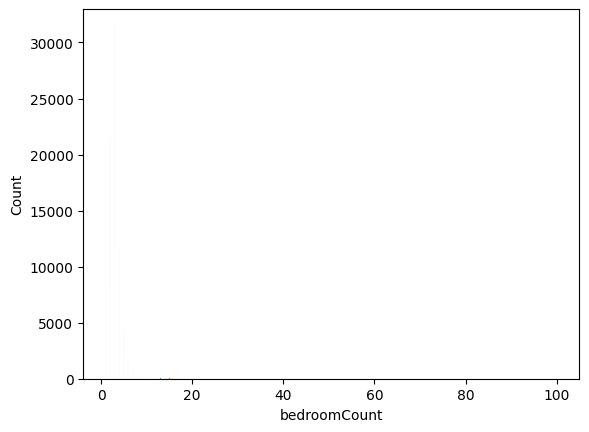

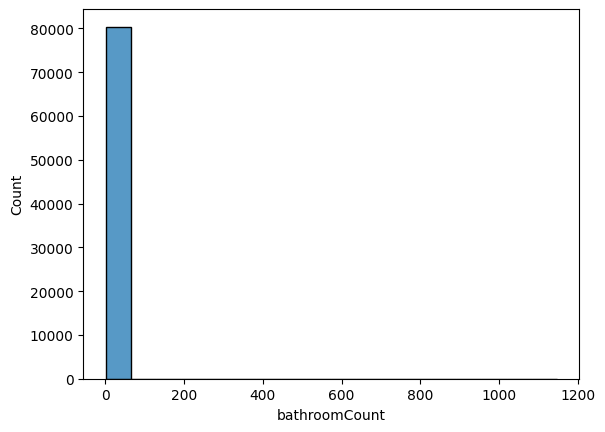

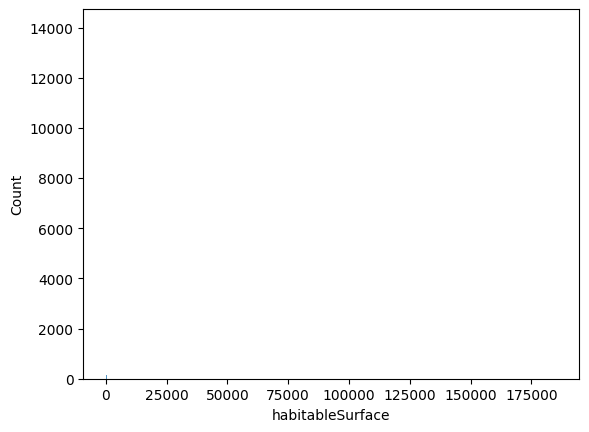

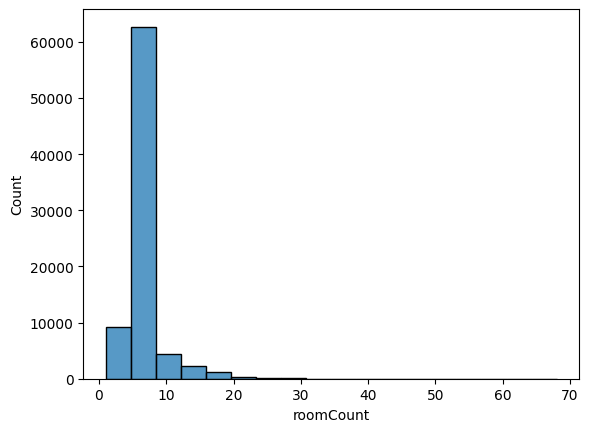

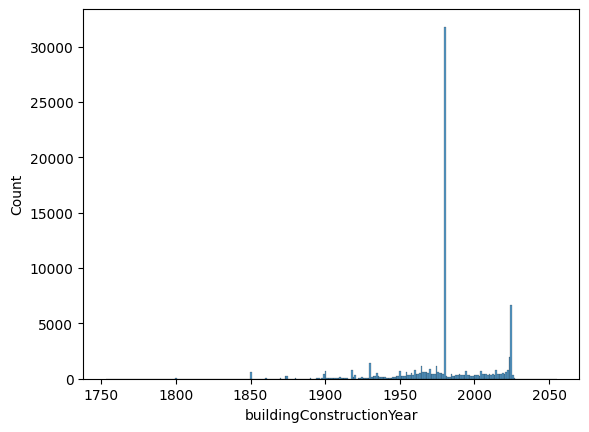

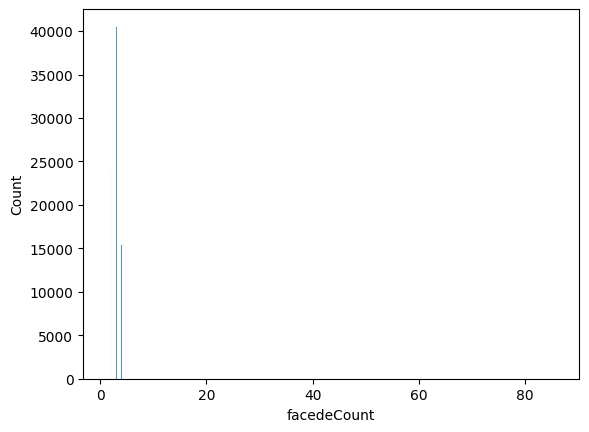

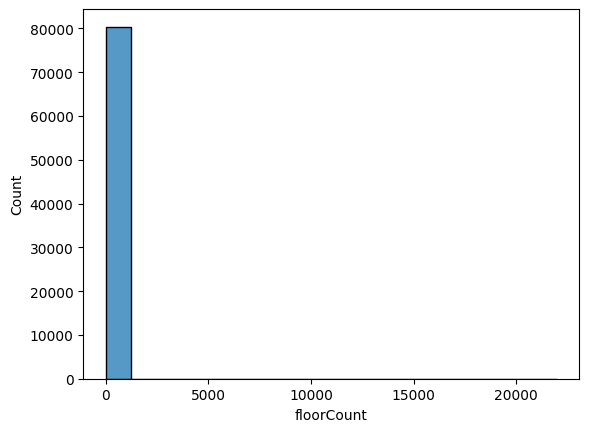

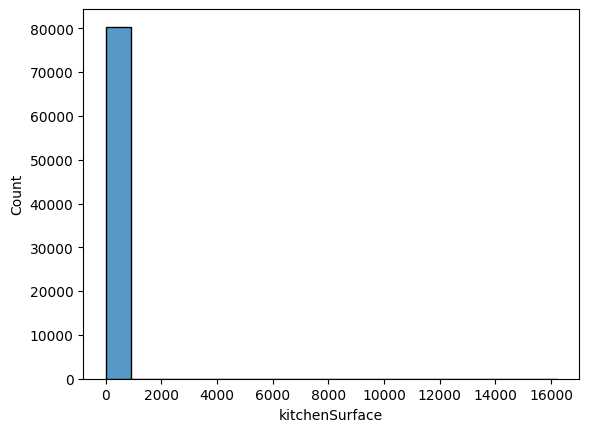

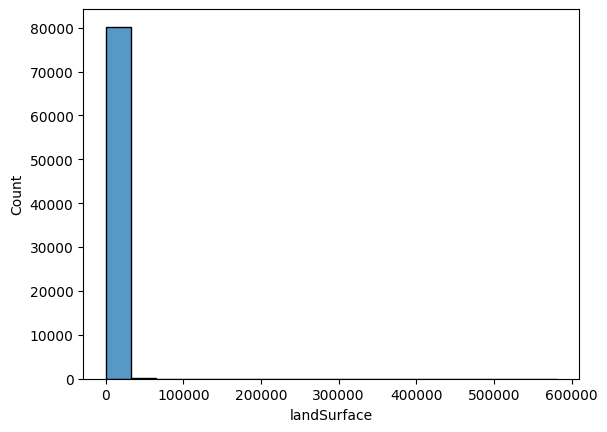

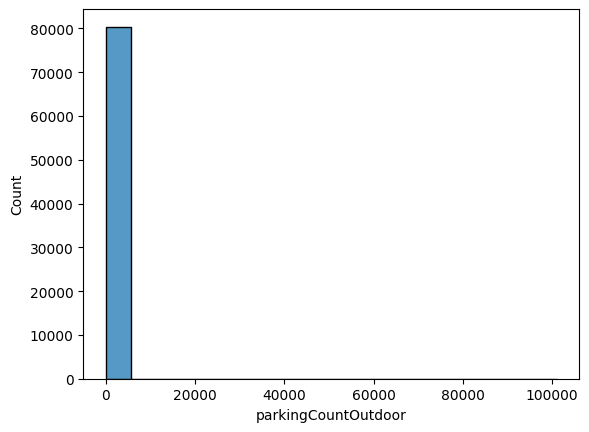

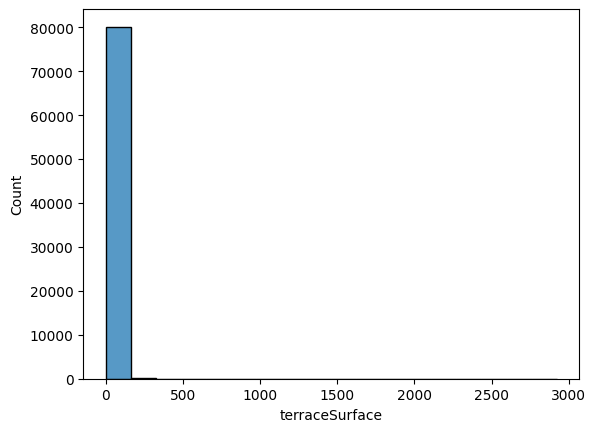

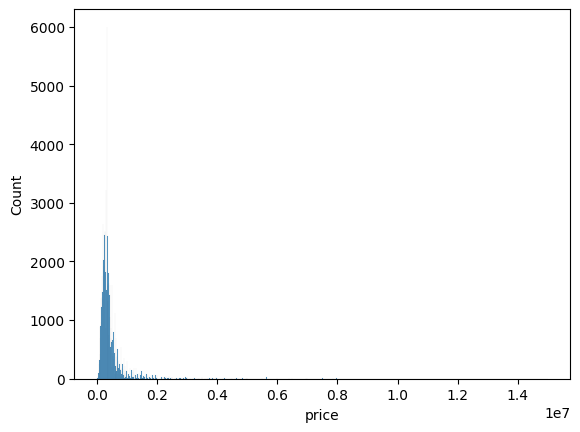

In [25]:
# Histogram to understand the distrubution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

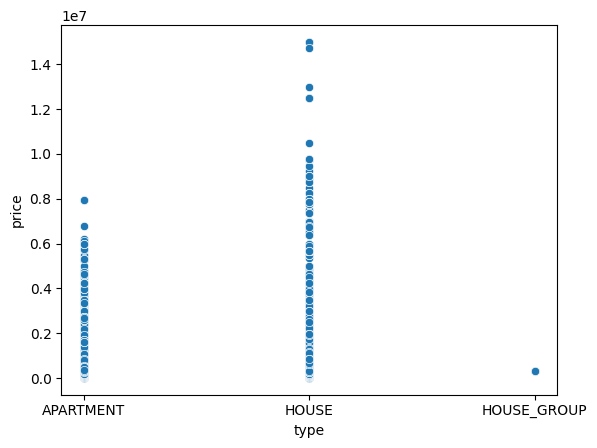

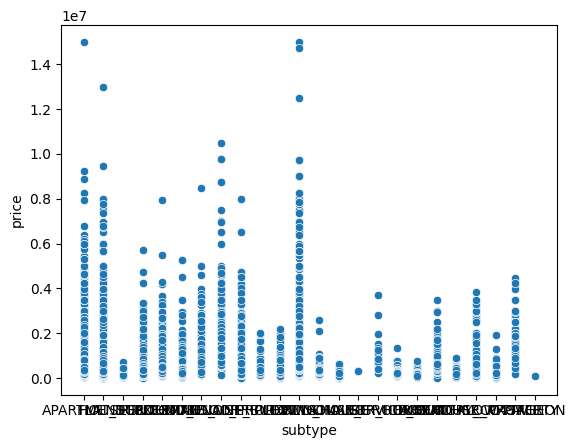

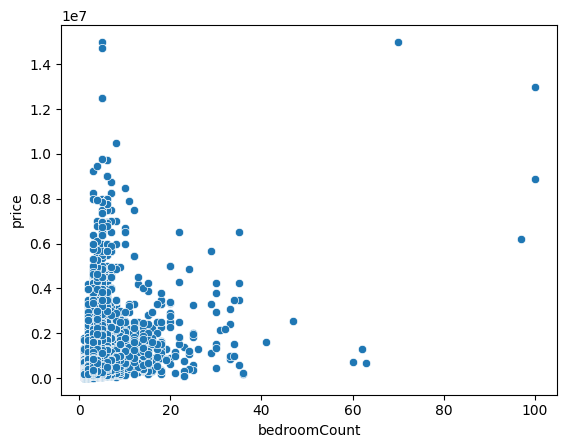

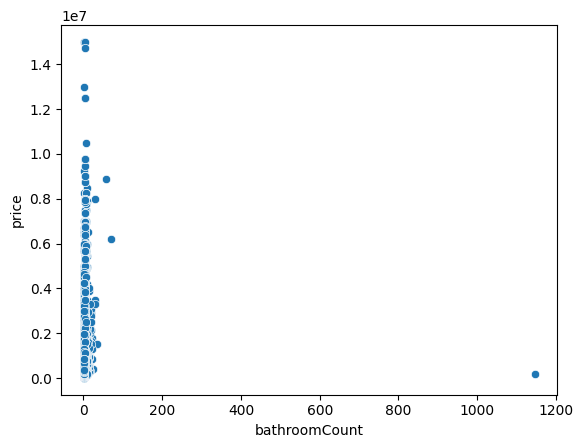

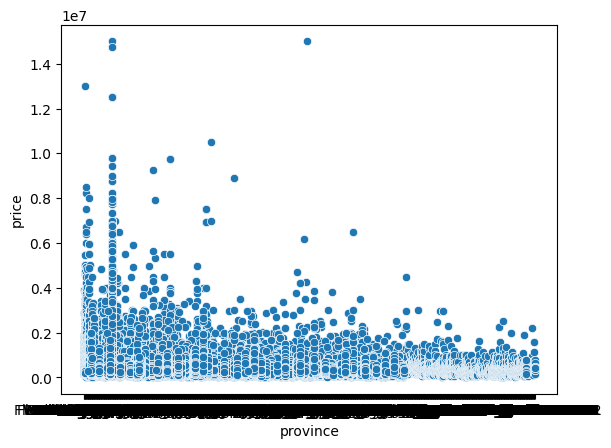

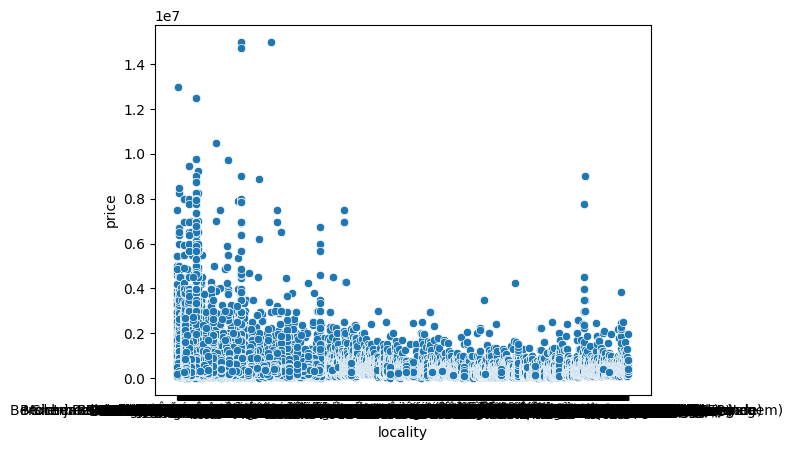

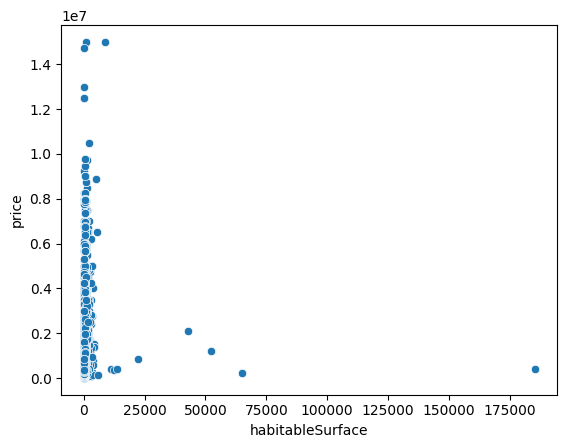

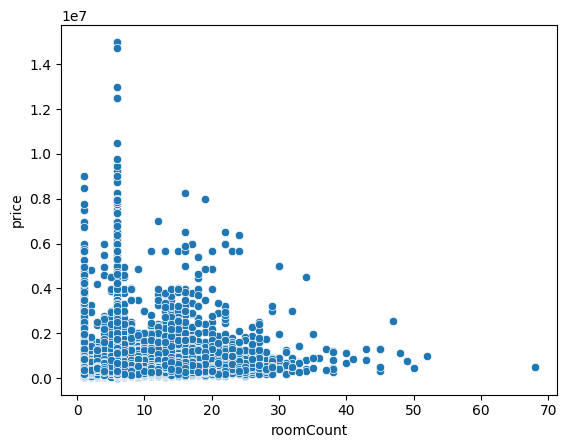

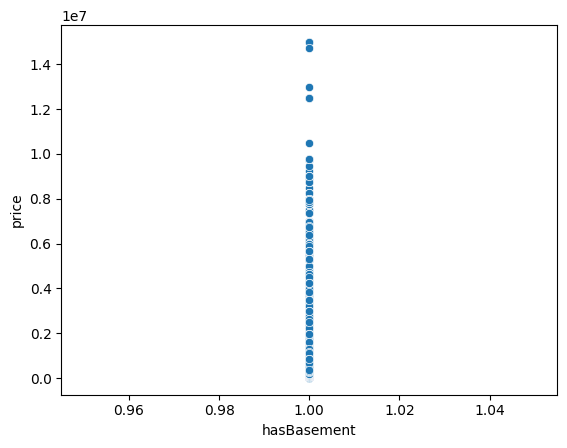

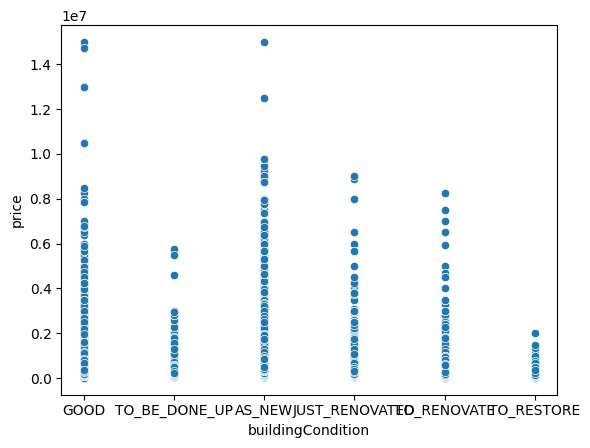

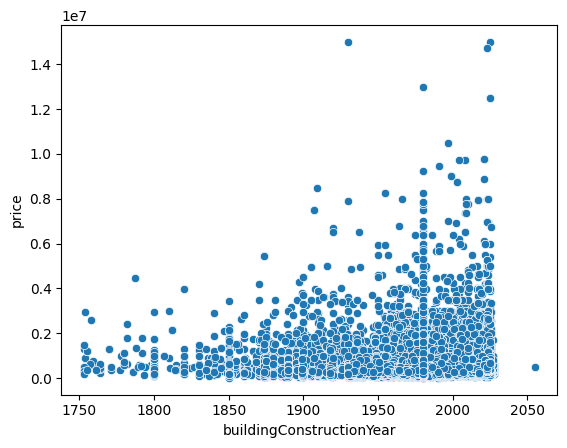

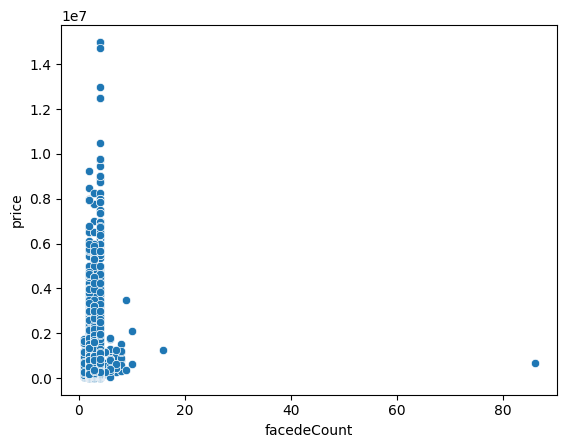

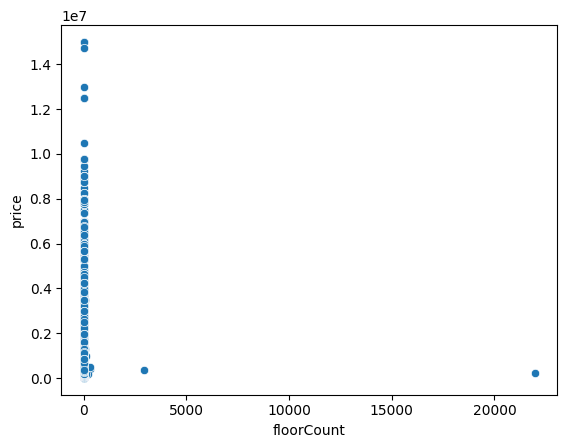

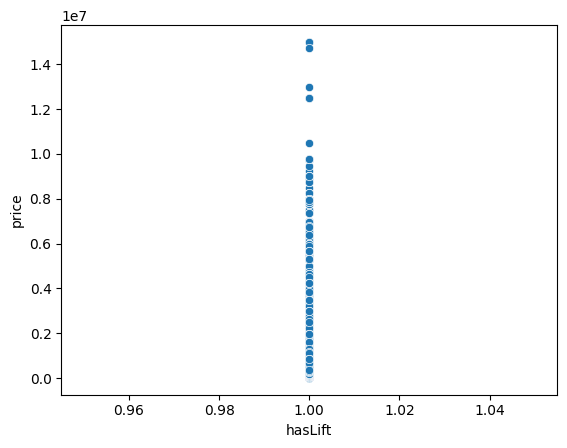

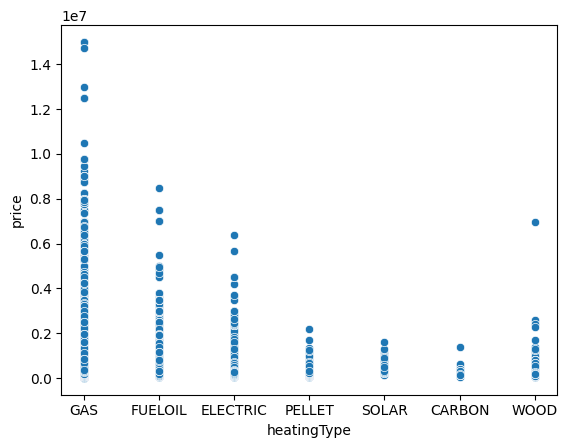

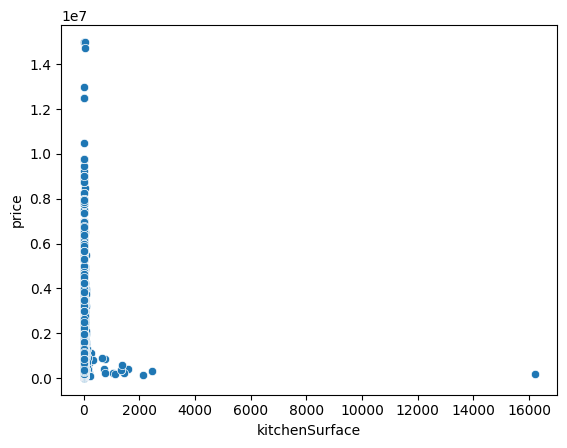

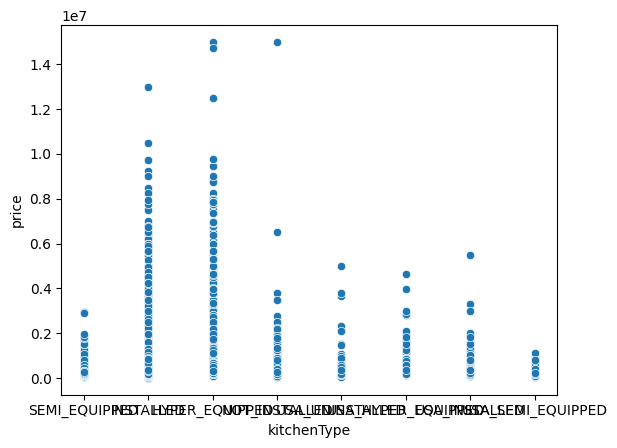

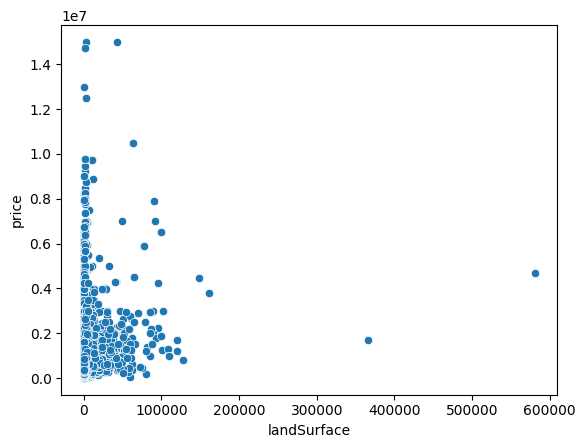

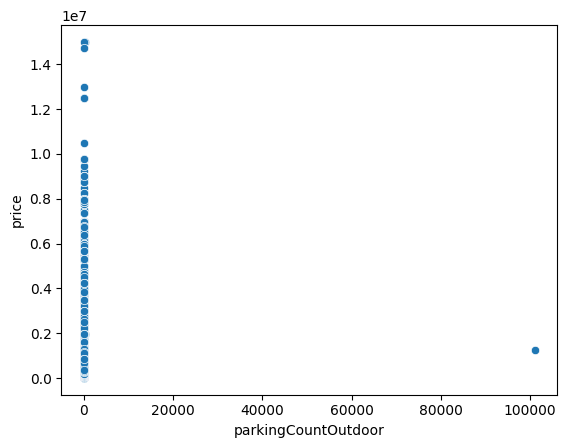

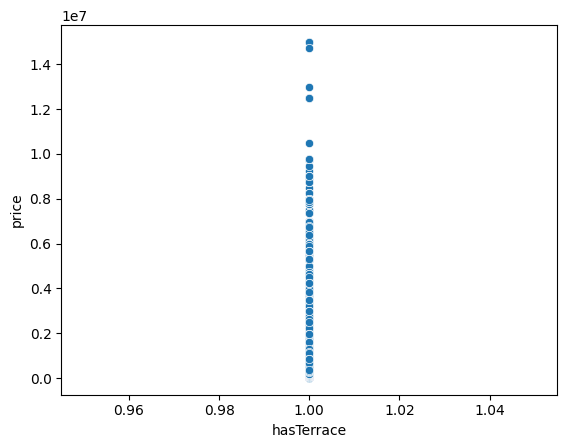

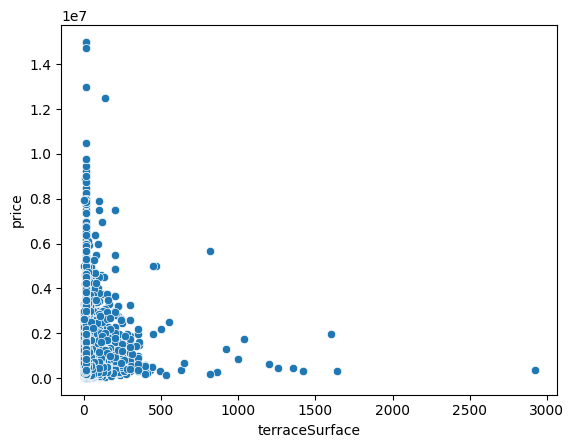

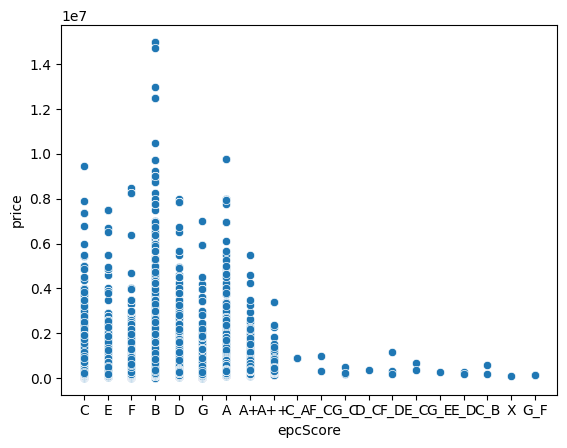

In [28]:
# sactterplot to understand the relationship
df.select_dtypes(include="number").columns
for i in ['type', 'subtype', 'bedroomCount', 'bathroomCount', 'province',
       'locality', 'habitableSurface', 'roomCount', 'hasBasement',
       'buildingCondition', 'buildingConstructionYear', 'facedeCount',
       'floorCount', 'hasLift', 'heatingType', 'kitchenSurface', 'kitchenType',
       'landSurface', 'parkingCountOutdoor', 'hasTerrace', 'terraceSurface',
       'epcScore']:
    sns.scatterplot(data=df, x=i, y='price')
    plt.show()

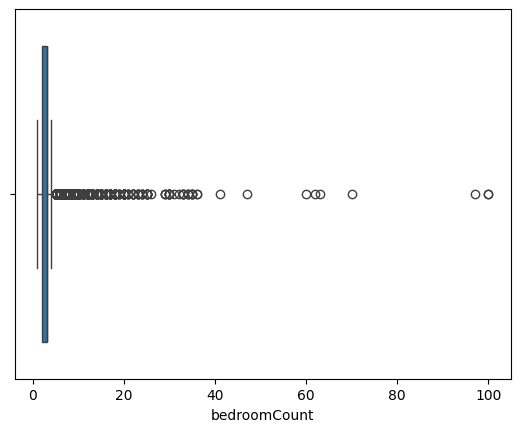

<Figure size 3000x3000 with 0 Axes>

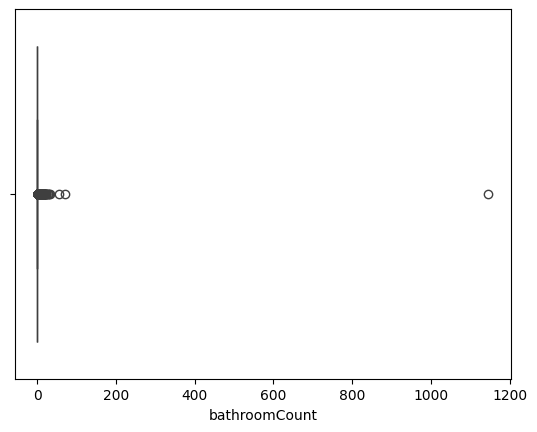

<Figure size 3000x3000 with 0 Axes>

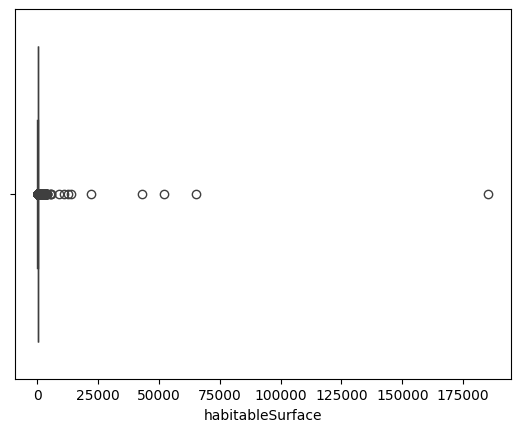

<Figure size 3000x3000 with 0 Axes>

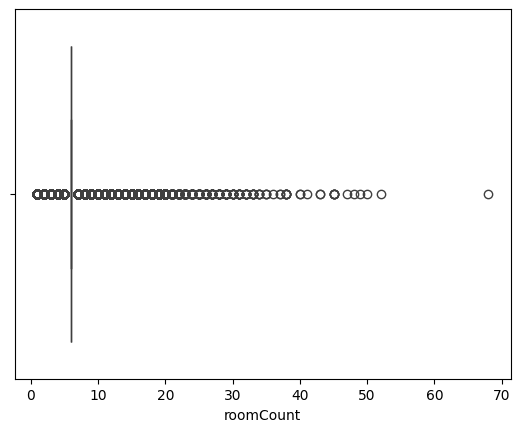

<Figure size 3000x3000 with 0 Axes>

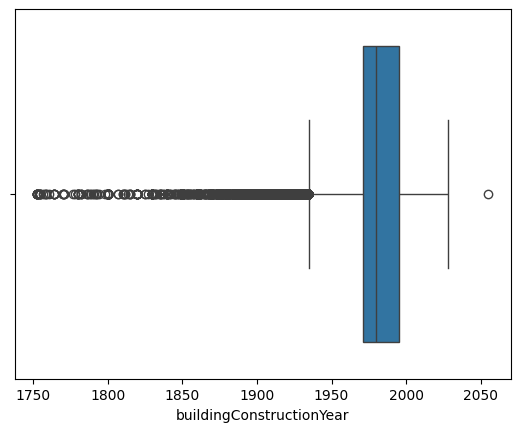

<Figure size 3000x3000 with 0 Axes>

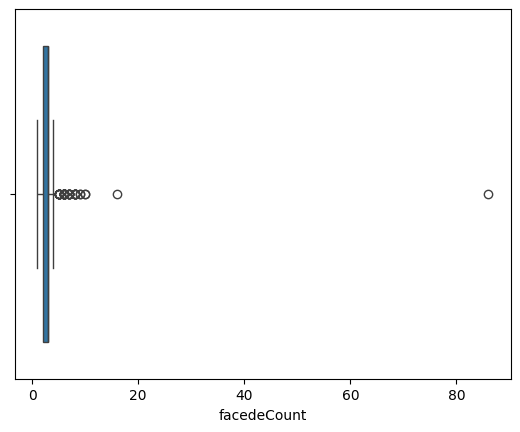

<Figure size 3000x3000 with 0 Axes>

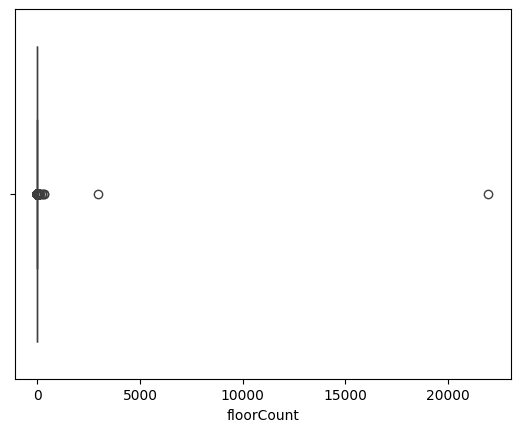

<Figure size 3000x3000 with 0 Axes>

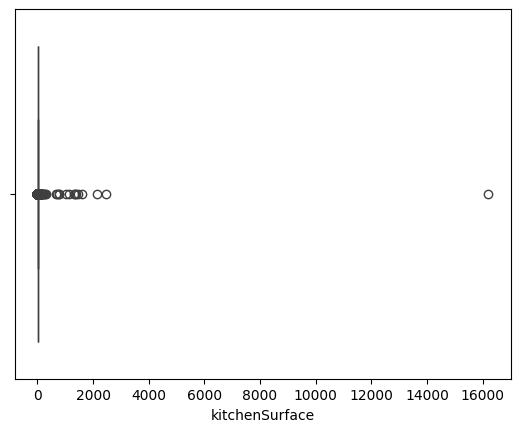

<Figure size 3000x3000 with 0 Axes>

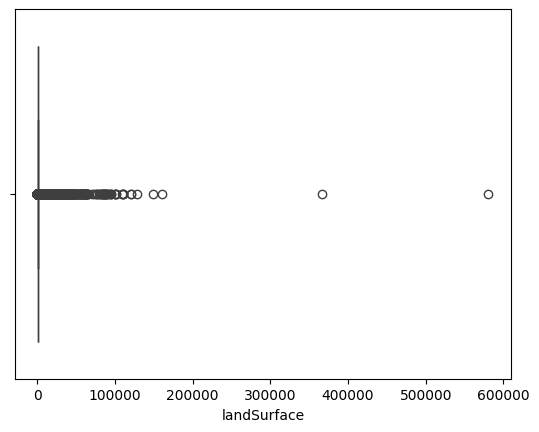

<Figure size 3000x3000 with 0 Axes>

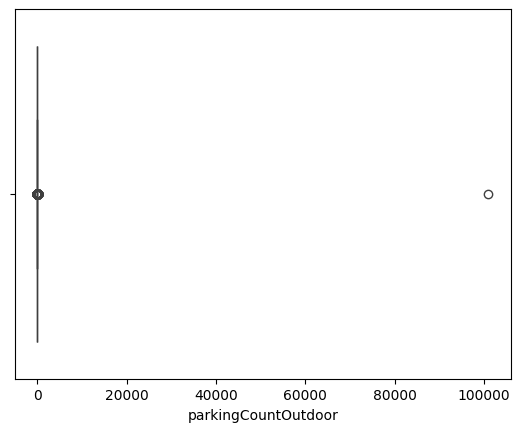

<Figure size 3000x3000 with 0 Axes>

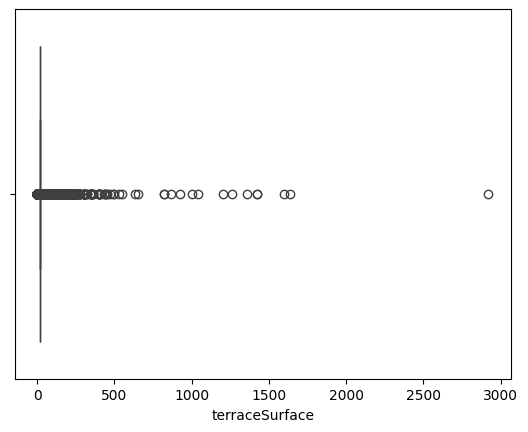

<Figure size 3000x3000 with 0 Axes>

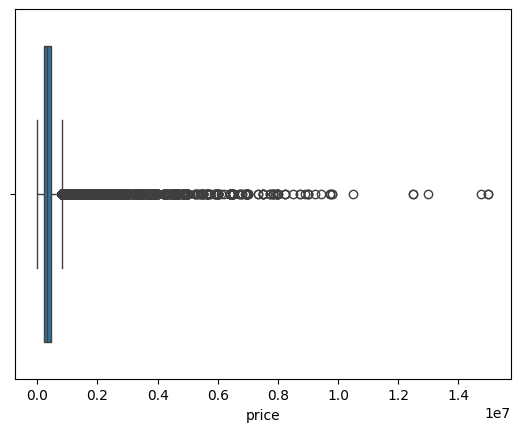

<Figure size 3000x3000 with 0 Axes>

In [43]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.figure(figsize=(30,30))
    plt.show()

In [33]:
# correlation with heatmap to ineterpret the relation and multicolliniarlity
s=df.select_dtypes(include="number").corr()
s

,bedroomCount,bathroomCount,habitableSurface,roomCount,buildingConstructionYear,facedeCount,floorCount,kitchenSurface,landSurface,parkingCountOutdoor,terraceSurface,price
bedroomCount,1.000000,0.132418,0.112471,0.119179,-0.137521,0.136075,-0.004054,0.010627,0.131803,0.031053,0.086339,0.368276
bathroomCount,0.132418,1.000000,0.019036,0.015667,-0.016460,0.012986,-0.000355,0.001848,0.027778,0.009165,0.021699,0.107535
habitableSurface,0.112471,0.019036,1.000000,0.017478,-0.026300,0.037436,-0.000892,0.002786,0.051798,0.004042,0.025338,0.093598
roomCount,0.119179,0.015667,0.017478,1.000000,-0.013212,-0.001612,-0.000483,0.004708,0.012537,-0.000305,0.029472,0.053349
buildingConstructionYear,-0.137521,-0.016460,-0.026300,-0.013212,1.000000,0.062927,-0.000169,-0.004128,-0.044745,-0.000296,-0.009995,0.024938
facedeCount,0.136075,0.012986,0.037436,-0.001612,0.062927,1.000000,-0.002466,0.009435,0.137029,0.005730,0.074821,0.143299
floorCount,-0.004054,-0.000355,-0.000892,-0.000483,-0.000169,-0.002466,1.000000,-0.000403,-0.001139,-0.000025,-0.001993,-0.001100
kitchenSurface,0.010627,0.001848,0.002786,0.004708,-0.004128,0.009435,-0.000403,1.000000,0.004874,-0.000032,0.006988,0.008407
landSurface,0.131803,0.027778,0.051798,0.012537,-0.044745,0.137029,-0.001139,0.004874,1.000000,0.001237,0.044002,0.197978
parkingCountOutdoor,0.031053,0.009165,0.004042,-0.000305,-0.000296,0.005730,-0.000025,-0.000032,0.001237,1.000000,0.000117,0.006514


<Axes: >

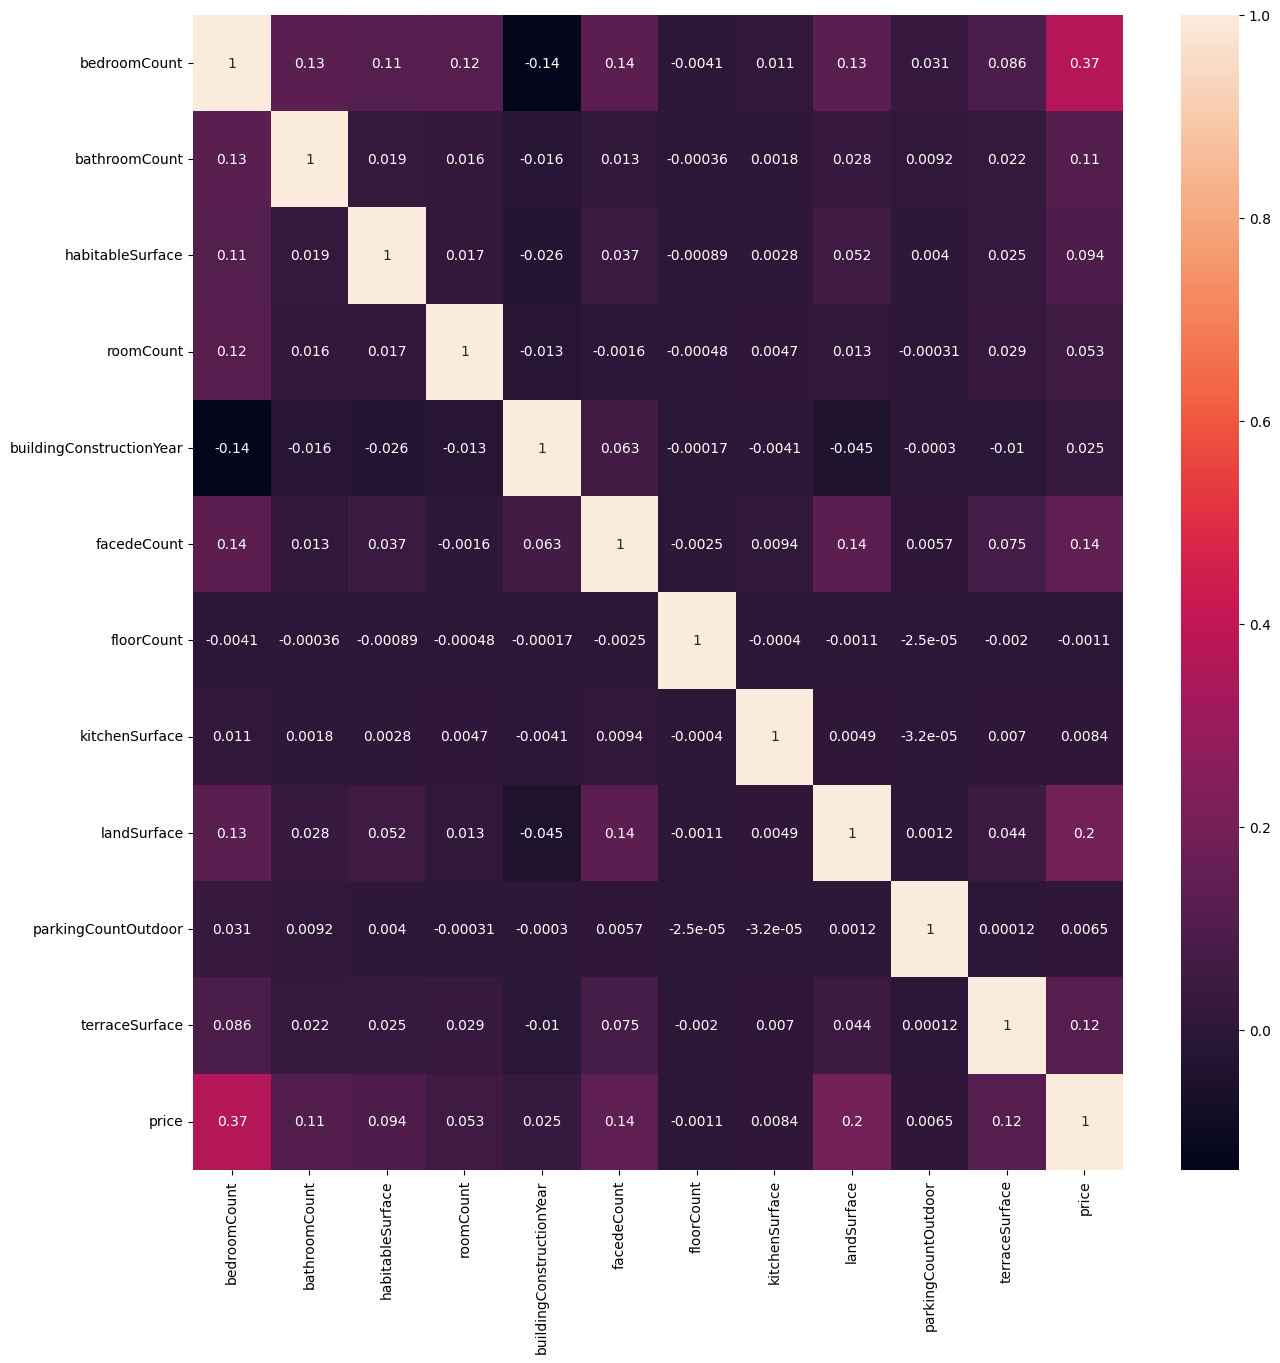

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(s, annot=True)